# <font color='289C4E'> It's a Dream Come True...<font>

You know how to develop video games, awesome! But now that you know how to do something you love, you must figure out how to get PAID to do something you love. As the data geek you are, you decide to analyze some data to help determine what your focus should be for your video game career. 

Lucky you! Kaggle has just the data set you need ([link to Kaggle data](https://www.kaggle.com/datasets/thedevastator/global-video-game-sales-ratings?resource=download)). It's pretty cool that Kaggle was able to use this data that originally came from  Timo Poutanen at the University of Helsinki ([link to original data source](https://zenodo.org/record/2454579#.Y9Y2c9JBwUE)). 



But what should you figure out to make a more informed decision? You know you're willing to move for that dream job so you need to explore data from all over the world. 

**Ultimately you decide you'd like to know:**
* What video game genre is the most popular worldwide? *(So you can know what you're most likely to build)* 
* What video game genre is the most popular from region to region *(So you know where to live if you want to build your favorite type, puzzle games!)* 
* What does video game genre popularity look like over time? *(So you know if you have job security)*
* What publisher has the most global sales? *(So you can find them on LinkedIn and see if they're hiring)* 
* What publishers are the most popular region to region? *(So you know where to move to chase that money!)*

So you settle in, put on your favorite [video game spotify playlist](https://open.spotify.com/playlist/3aI7ztMmDhMHhYe1KOPFLG?si=b0c47f2577f14549) and get to work dissecting this data just like Link would.  

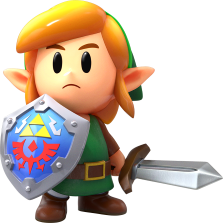


___
___

### <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a>
This data evaluation is broken out into the following sections:

1. [Cleaning the Data](#CleaningData)
2. [Anwsering the Questions](#Anwseringquestions)
3. [Making Cool Graphs](#Coolgraphs)
4. [Final Notes and Thoughts](#Notes)

___
___

In [1]:
#packages needed

import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
#reading in the data 

raw_data = Path('data/raw-data.csv')
vg_df = pd.read_csv(raw_data)

<a id='Cleaningdata'></a>

## <font color='289C4E'>Cleaning the Data<font>

First things first, you notice there are some columns in this nice raw data set that just might be a little messy when you're trying to vizualize everything. Let's get rid of those:

**Columns to Keep:** Name, Year_of_Release, Genre, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global Sales, Publisher

**Columns to Remove:** Platform, Critic_Score, User_Score, User_Count, Developer, Rating, Critic_Count

In [218]:
#dropping columns 
clean_df = vg_df.drop(['Critic_Score', 'User_Score', 'User_Count', 'Developer', 'Rating', "Critic_Count", 'Platform'], axis=1)
clean_df.head()

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Next, you know that you should eliminate any null values from your data set. So you take a look to see what might need to be removed: 

In [219]:
#checking for null data to remove
clean_df.isnull().sum().sort_values(ascending=False)

Year_of_Release    269
Publisher           54
Name                 2
Genre                2
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
dtype: int64

You know you'd like to look at Year of Release, Publisher, and Genre, so you remove those null values to have a nice complete and clean data set to work from. 

In [220]:
#dropping any NA values from the dataframe
clean_df.dropna(axis=0, inplace=True)

#verifying there are no null values remaining
clean_df.isnull().sum().sort_values(ascending=False)

Name               0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

In [221]:
#seeing what the resulting dataset now looks like 
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 16718
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  object 
 1   Year_of_Release  16416 non-null  float64
 2   Genre            16416 non-null  object 
 3   Publisher        16416 non-null  object 
 4   NA_Sales         16416 non-null  float64
 5   EU_Sales         16416 non-null  float64
 6   JP_Sales         16416 non-null  float64
 7   Other_Sales      16416 non-null  float64
 8   Global_Sales     16416 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.3+ MB


In [222]:
clean_df.head()

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


One last thing is to make the Year of Release look a little cleaner

In [223]:
clean_df['Year_of_Release'] = clean_df['Year_of_Release'].astype('int')
clean_df.head()

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### Cleaning Summary:  

In total, you cleaned a few items from the original raw file:

1. Removed unnecessary columns from the dataframe 
2. Removed null values found in the Year_of_Release, Name, Publisher, and Genre columns. This left the final data set as 16416 rows and 9 columns
2. Update the Year_of_Release column from a float to an int

It is also worth noting the sales data is in millions. For example, 82.53 Global Sales for Wii Sports is $82,530,000. That's a lot of gold coins!
___
___

<a id='Anwseringquestions'></a>

## <font color='289C4E'>Anwsering the Questions<font>

Know that you have a clean data set to work from, it's time to find your inner Mario, update your [playlist](https://open.spotify.com/album/3bBCofH4VxHokZ6fRCgbGx?si=MbjwLo_CQtWKkpAHI749PQ) and get into the nitty gritty. 

**Let's a go!**

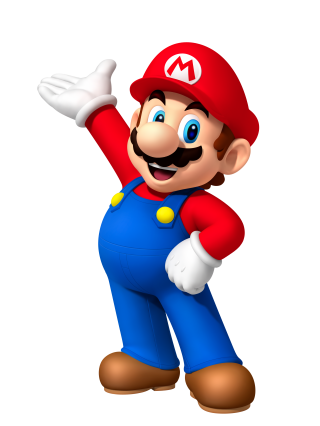

* What video game genre is the most popular worldwide? 
* What video game genre is the most popular from region to region 
* What does video game genre popularity look like over time? 
* What publisher has the most global sales? 
* What publishers are the most popular region to region? 
___
___

### 1. What video game genre is the most popular worldwide?

To anwser this question, you need to group the data set by genre and sales information. 

In [224]:
#getting value counts for each record in the Genre colulm
genre_counts = clean_df['Genre'].value_counts()
print(genre_counts)

Action          3307
Sports          2306
Misc            1697
Role-Playing    1483
Shooter         1296
Adventure       1291
Racing          1225
Platform         878
Simulation       855
Fighting         837
Strategy         672
Puzzle           569
Name: Genre, dtype: int64


In [225]:
#grouping genre by Global Sales
genre_grouped = clean_df.groupby(by='Genre')['Global_Sales'].sum().sort_values(ascending=False)
print(genre_grouped)


Genre
Action          1717.62
Sports          1310.39
Shooter         1041.83
Role-Playing     930.90
Platform         825.86
Misc             783.19
Racing           723.69
Fighting         442.63
Simulation       388.22
Puzzle           240.33
Adventure        233.25
Strategy         172.69
Name: Global_Sales, dtype: float64


It appears that Action games are the most popular worldwide, both by sales and volume! Now you know learning how to code Action games is likely the most worthwile of your time. 

---

### 2. What video game genre is the most popular from region to region?

In [226]:
#grouping by genre and summing for each sales region

genre_grouped_region = clean_df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
print(genre_grouped_region)

              NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action          863.17    510.99    160.14       182.22
Adventure       101.39     63.15     52.22        16.37
Fighting        220.51     99.00     87.28        35.87
Misc            394.01    208.55    107.02        73.00
Platform        444.44    199.39    130.71        51.01
Puzzle          121.13     49.78     56.68        12.30
Racing          356.86    234.48     56.63        75.51
Role-Playing    330.04    188.24    353.44        59.41
Shooter         584.83    314.52     38.68       103.33
Simulation      180.67    113.17     63.64        30.59
Sports          671.20    371.33    134.93       132.21
Strategy         67.69     44.69     49.30        10.73


In [227]:
#North America
NA_sales_by_genre = clean_df.groupby(by='Genre')['NA_Sales'].sum()
NA_top_genre = NA_sales_by_genre.idxmax()
NA_top_sales = NA_sales_by_genre.loc[NA_top_genre]

#Japan
JP_sales_by_genre = clean_df.groupby(by='Genre')['JP_Sales'].sum()
JP_top_genre = JP_sales_by_genre.idxmax()
JP_top_sales = JP_sales_by_genre.loc[JP_top_genre]

#Europe
EU_sales_by_genre = clean_df.groupby(by='Genre')['EU_Sales'].sum()
EU_top_genre = EU_sales_by_genre.idxmax()
EU_top_sales = EU_sales_by_genre.loc[EU_top_genre]

#Other
Other_sales_by_genre = clean_df.groupby(by='Genre')['Other_Sales'].sum()
Other_top_genre = Other_sales_by_genre.idxmax()
Other_top_sales = Other_sales_by_genre.loc[Other_top_genre]


print("The top genre in North America is", NA_top_genre, "with", NA_top_sales, "millions in sales")
print("The top genre in Japan is", JP_top_genre, "with", JP_top_sales, "millions in sales")
print("The top genre in Europe is", EU_top_genre, "with", EU_top_sales, "millions in sales")
print("The top genre in the rest of the world is", Other_top_genre, "with", Other_top_sales, "millions in sales")

The top genre in North America is Action with 863.17 millions in sales
The top genre in Japan is Role-Playing with 353.44 millions in sales
The top genre in Europe is Action with 510.99 millions in sales
The top genre in the rest of the world is Action with 182.22 millions in sales


It is interesting that Action is the top video game genre in all areas tracked by this data set except for Japan. So now you know if you want to live in Japan, you might want to specialize more in Role-Playing video game genres!

---

### 3. What does video game genre popularity look like over time?

First you want to take a look at the data set to see what type of grouping might make sense for this data. 

In [228]:
clean_df["Year_of_Release"].min()

1980

In [229]:
clean_df["Year_of_Release"].max()

2020

It appears that the data starts in 1980 and goes through 2020. Since you already removed all null values nothing else needs to be cleaned here. You know you want to break this out into decades to make it a little easier to view the trends.

In [230]:
#creating labels for the dataset by decade
labels = ["1980's", "1990's", "2000's", "2010's", "2020's"]
bins = [1980, 1990, 2000, 2010, 2020, 2030]
clean_df['Decade'] = pd.cut(clean_df['Year_of_Release'], bins=bins, labels=labels, right=False)
clean_df['Decade'].value_counts()

2000's    9168
2010's    5273
1990's    1769
1980's     205
2020's       1
Name: Decade, dtype: int64

In [231]:
#viewing the new dataframe
clean_df.head()

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade
0,Wii Sports,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,2000's
1,Super Mario Bros.,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980's
2,Mario Kart Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,2000's
3,Wii Sports Resort,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,2000's
4,Pokemon Red/Pokemon Blue,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1990's


Now that a Decade column is added to the dataframe, you know you want to group this data by Deacde and Genre

In [232]:
#Decade data broken out by Genre
decades_df = clean_df.groupby(['Genre', 'Decade'])['Name'].count()
print(decades_df)

Genre         Decade
Action        1980's      66
              1990's     162
              2000's    1584
              2010's    1495
              2020's       0
Adventure     1980's       2
              1990's      97
              2000's     630
              2010's     562
              2020's       0
Fighting      1980's       4
              1990's     193
              2000's     441
              2010's     199
              2020's       0
Misc          1980's       8
              1990's     116
              2000's     997
              2010's     576
              2020's       0
Platform      1980's      33
              1990's     125
              2000's     567
              2010's     153
              2020's       0
Puzzle        1980's      19
              1990's      71
              2000's     365
              2010's     114
              2020's       0
Racing        1980's       8
              1990's     183
              2000's     798
              2010's  

In [233]:
#resetting the index to make the data easier to visualize 
decades_reset = decades_df.reset_index()
decades_reset.head()

,Genre,Decade,Name
0,Action,1980's,66
1,Action,1990's,162
2,Action,2000's,1584
3,Action,2010's,1495
4,Action,2020's,0


In [234]:
#Genre data broken out by Decade
genre_df = clean_df.groupby(['Decade', 'Genre'])['Name'].count()
print(genre_df)

Decade  Genre       
1980's  Action            66
        Adventure          2
        Fighting           4
        Misc               8
        Platform          33
        Puzzle            19
        Racing             8
        Role-Playing       9
        Shooter           30
        Simulation         3
        Sports            23
        Strategy           0
1990's  Action           162
        Adventure         97
        Fighting         193
        Misc             116
        Platform         125
        Puzzle            71
        Racing           183
        Role-Playing     172
        Shooter          137
        Simulation        86
        Sports           304
        Strategy         123
2000's  Action          1584
        Adventure        630
        Fighting         441
        Misc             997
        Platform         567
        Puzzle           365
        Racing           798
        Role-Playing     732
        Shooter          719
        Simulation    

You think it's interesting to see that video game popularlity really surged in the 2000's, seeing a jump in every single genre. You want to dig into this data more with a vizualiazation, but for now it's safe to say your job is secure. 

---

### 4. What publisher has the most global sales? 

You're interested to see what publisher has the most sales to know who you might want to work for! 

In [235]:
#exploring publisher and global sales data
pub_sales = clean_df.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending=False)
print(pub_sales)

Publisher
Nintendo                       1786.72
Electronic Arts                1100.05
Activision                      725.14
Sony Computer Entertainment     606.27
Ubisoft                         470.45
                                ...   
Genterprise                       0.01
Inti Creates                      0.01
Interworks Unlimited, Inc.        0.01
Interchannel-Holon                0.01
Paradox Development               0.01
Name: Global_Sales, Length: 579, dtype: float64


In [236]:
pub_top = pub_sales.head(5)
print(pub_top)

Publisher
Nintendo                       1786.72
Electronic Arts                1100.05
Activision                      725.14
Sony Computer Entertainment     606.27
Ubisoft                         470.45
Name: Global_Sales, dtype: float64


You notice it looks like the top Publisher with the most global sales is Nintendo! Neato!

---

### 5. What publishers are the most popular region to region?

You know you really only want the best of the best, so you decide to look at the top 5 for each region so you can look on their websites for job postings. 

In [237]:
#grouping all of the sales data together by Publisher
sales_by_publisher = clean_df.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
print(sales_by_publisher)

                              NA_Sales  EU_Sales  JP_Sales  Other_Sales
Publisher                                                              
10TACLE Studios                   0.07      0.04      0.00         0.00
1C Company                        0.01      0.07      0.00         0.01
20th Century Fox Video Games      1.82      0.10      0.00         0.01
2D Boy                            0.00      0.03      0.00         0.01
3DO                               6.48      3.04      0.00         0.63
...                                ...       ...       ...          ...
id Software                       0.02      0.00      0.00         0.00
imageepoch Inc.                   0.00      0.00      0.04         0.00
inXile Entertainment              0.03      0.06      0.00         0.01
mixi, Inc                         0.00      0.00      0.87         0.00
responDESIGN                      0.09      0.04      0.00         0.01

[579 rows x 4 columns]


In [238]:
#getting the top 5 highest sales by Publisher in NA
na_sorted = sales_by_publisher.sort_values('NA_Sales', ascending=False)
top_5_na = na_sorted['NA_Sales'].head(5)

#getting the top 5 highest sales by Publisher in EU
eu_sorted = sales_by_publisher.sort_values('EU_Sales', ascending=False)
top_5_eu = na_sorted['EU_Sales'].head(5)

#getting the top 5 highest sales by Publisher in Japan
jp_sorted = sales_by_publisher.sort_values('JP_Sales', ascending=False)
top_5_jp = jp_sorted['JP_Sales'].head(5)

#getting the top 5 highest sales by Publisher in other regions
other_sorted = sales_by_publisher.sort_values('Other_Sales', ascending=False)
top_5_other = other_sorted['Other_Sales'].head(5)

In [239]:
#combining all of the new series into a new dataframe for better visualizing 
pub_comp_df = pd.concat([top_5_na, top_5_eu, top_5_jp, top_5_other], axis=1).fillna('-')
pub_comp_df = pub_comp_df.round(2)
print(pub_comp_df)

                             NA_Sales EU_Sales JP_Sales Other_Sales
Publisher                                                          
Nintendo                       815.86   418.58   457.74       94.55
Electronic Arts                588.65   370.02        -      126.82
Activision                     428.92    214.1        -       75.27
Sony Computer Entertainment    266.17    186.4    74.15       79.62
Ubisoft                        252.12   161.72        -           -
Namco Bandai Games                  -        -   127.62           -
Konami Digital Entertainment        -        -    91.03           -
Capcom                              -        -    67.73           -
Take-Two Interactive                -        -        -       55.68


You notice that if you want to stay in North America or the EU, the top 5 companies are the same as the global sales. However, if you decide to live and work in Japan you'll need to consider other options! The second highest performing publishes for game sales in Japan is Namco Bandai Games. Two other continders would be Kanomi Digital Entertainment and Capcom. You notice another interesting callout that Take-Two interactive is a contender only for sales outside of Japan, EU, and the US.

However, the clear lead is stil Nintendo! 

___
___

<a id='Coolgraphs'></a>
## <font color='289C4E'>Making Cool Graphs<font>

Finally it's time for you to embrace your inner artist and make some cool graphs to help you make your final decision. Fuel up with a snack first, Donkey's favorite is bananas! 

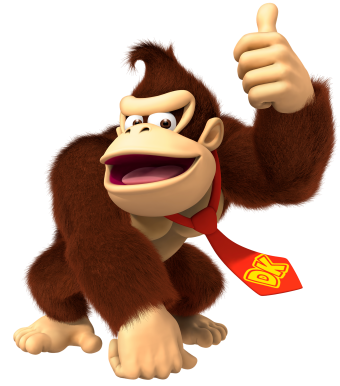

___
___

### 1. What video game genre is the most popular worldwide?

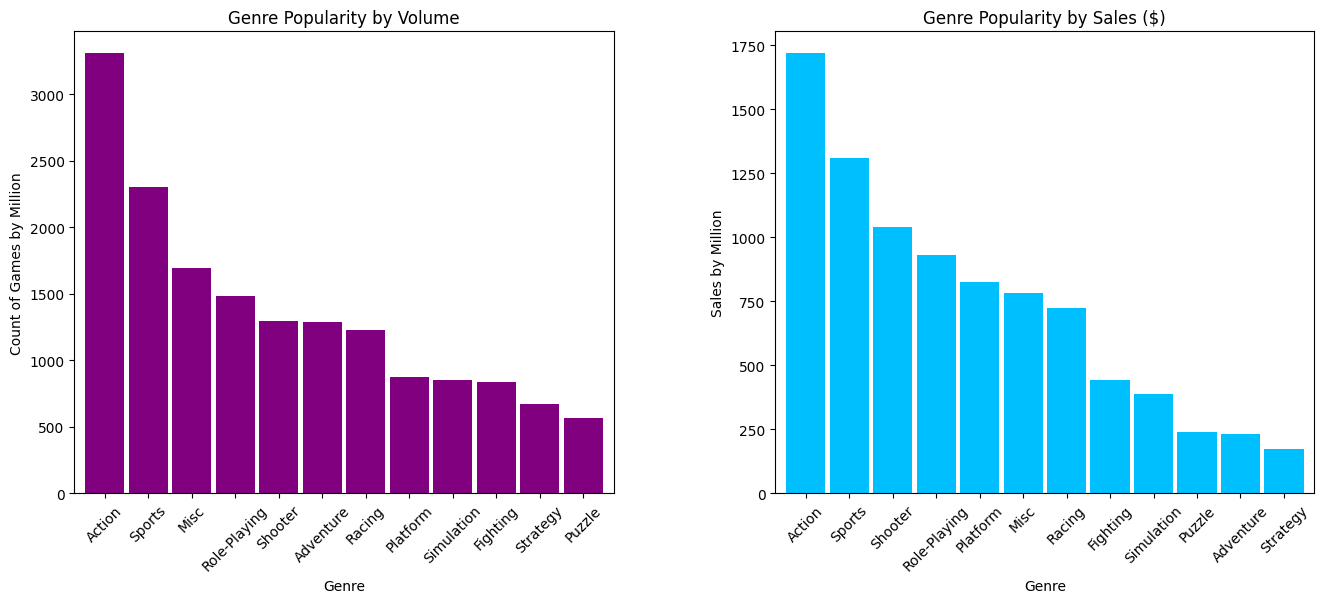

In [241]:
#create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,6))

#create a bar plot of genre counts on the first subplot
genre_counts.plot(kind='bar', x='Genre', y='Count', color='purple', width=.9, rot=45, ax=ax1)
ax1.set(title='Genre Popularity by Volume', xlabel='Genre', ylabel='Count of Games by Million')

#create a bar plot of genre sales on the second subplot
genre_grouped.plot(kind='bar', x='Genre', y='Sales', color='#00bfff', width=.9, rot=45, ax=ax2)
ax2.set(title='Genre Popularity by Sales ($)', xlabel='Genre', ylabel='Sales by Million')

#adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

#display the plot
plt.show()

---

### 2. What video game genre is the most popular from region to region?

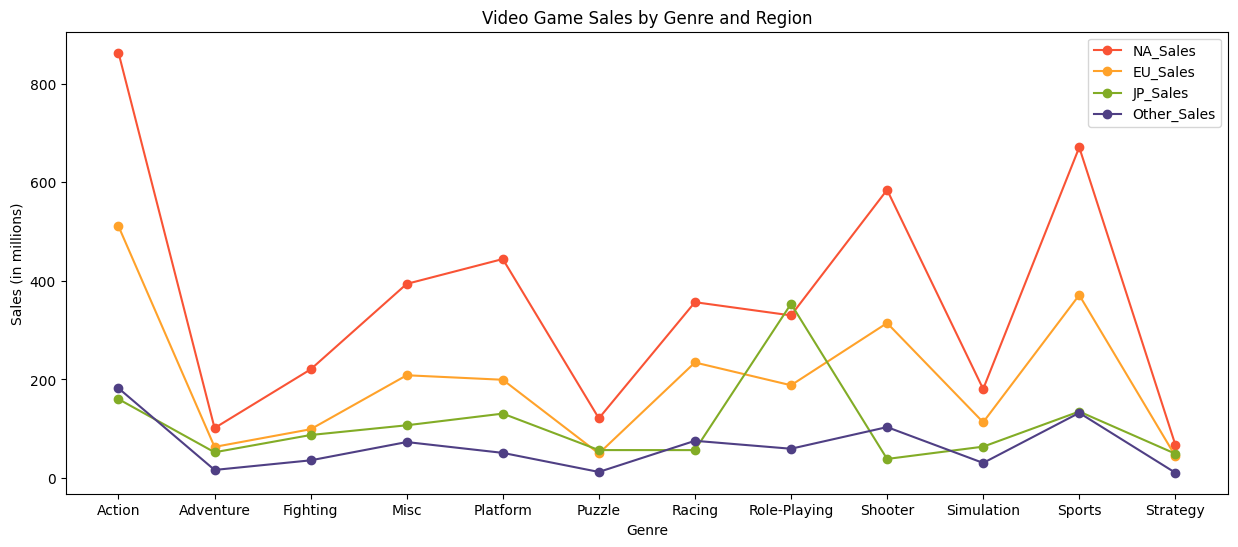

In [242]:
#create a new figure
fig = plt.figure(figsize=(15, 6))

#add a single subplot
ax = fig.add_subplot(1, 1, 1)

#define the colors for each decade
colors = ["#F95335", "#FFA22A", "#82AC26", "#4f3f84"]

#plot each sales region as a separate line
for i, col in enumerate(genre_grouped_region.columns):
    ax.plot(genre_grouped_region.index, genre_grouped_region[col], label=col, marker='o', color=colors[i])

#add x- and y-axis labels
ax.set_xlabel('Genre')
ax.set_ylabel('Sales (in millions)')

#add a title and legend
ax.set_title('Video Game Sales by Genre and Region')
ax.legend()

#display the plot
plt.show()

---

### 3. What does video game genre popularity look like over time?

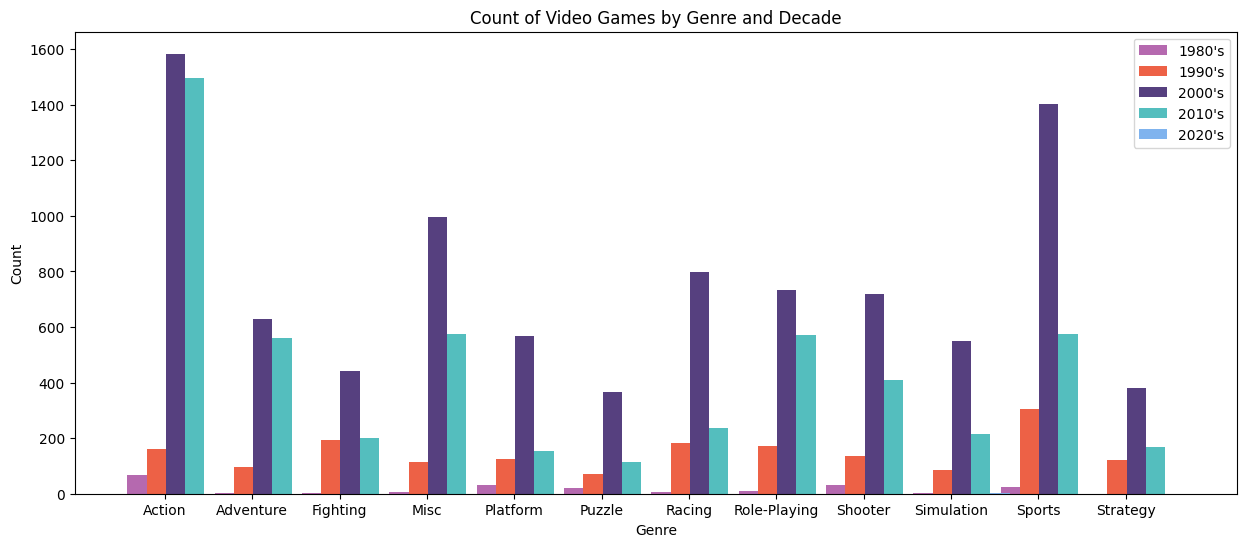

In [243]:
#create a figure and axis object
fig, ax = plt.subplots(figsize=(15, 6))

#define the data
genres = decades_reset['Genre'].unique()
decades = decades_reset['Decade'].unique()

#define the colors for each decade
colors = ["#b569af", "#ed6146", "#56407f", "#54bebe", "#7fb3ee"]

#initialize the bar positions and width
bar_width = 0.22
bar_gap = .10
bar_positions = np.arange(len(genres))

#plot each decade's counts as a grouped bar
for i, decade in enumerate(decades):
    counts = decades_reset[decades_reset['Decade'] == decade]['Name']
    ax.bar(bar_positions + i*bar_width, counts, bar_width, label=decade, color=colors[i])

#set the chart title and axis labels
ax.set_title('Count of Video Games by Genre and Decade')
ax.set_xlabel('Genre')
ax.set_ylabel('Count')

#add x-axis tick labels
ax.set_xticks(bar_positions + (bar_width+.1))
ax.set_xticklabels(genres)

#add a legend
ax.legend()

#display the chart
plt.show()

---

### 4. What publisher has the most global sales? 

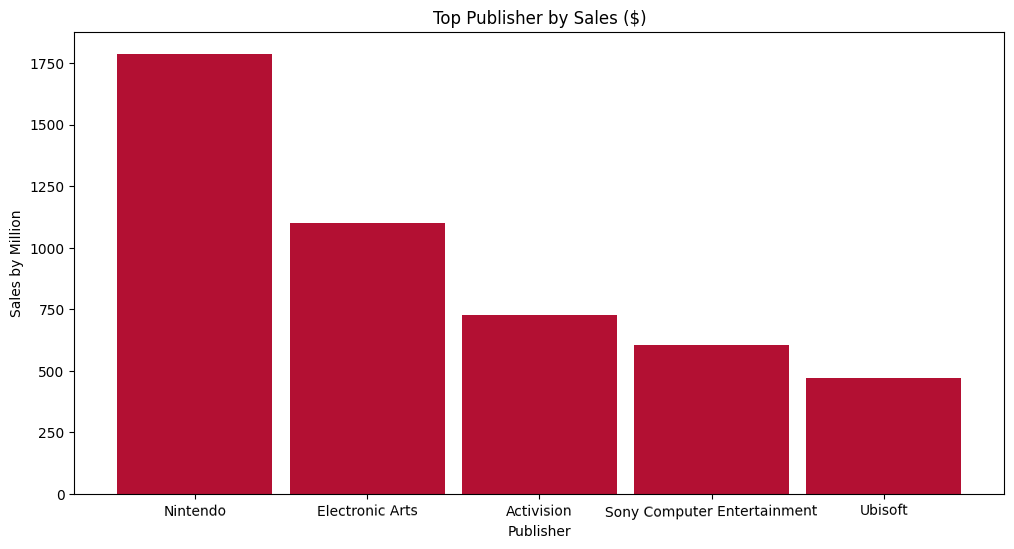

In [244]:
#create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

#create a bar plot of genre counts
ax = pub_top.plot(kind='bar', x='Publisher', y='Sales', color='#B31033', width=.9, rot=.45)

#set plot title, axis labels, and y-axis scale
ax.set(title='Top Publisher by Sales ($)', xlabel='Publisher', ylabel='Sales by Million')

#display the plot
plt.show()

---

### 5. What publishers are the most popular region to region?

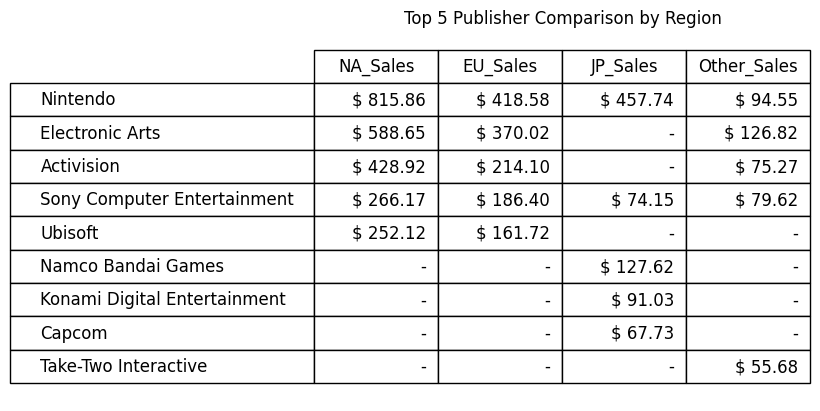

In [245]:
#create a figure and axis object
fig, ax = plt.subplots()

#format the values in the dataframe to two decimal places with a dollar sign
pub_comp_df_formatted = pub_comp_df.applymap(lambda x: "$ {:.2f}".format(x) if isinstance(x, (int, float)) else x)

#create a table from the formatted dataframe and add it to the plot
table = ax.table(cellText=pub_comp_df_formatted.values, colLabels=pub_comp_df_formatted.columns, rowLabels=pub_comp_df_formatted.index, loc='center')

#set the table properties
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)

#remove the axis ticks and labels
ax.axis('off')

#set the plot title
ax.set_title('Top 5 Publisher Comparison by Region')

#display the plot
plt.show()

<a id='Notes'></a>
## <font color='289C4E'>Final Notes and Thoughts<font color='289C4E'>


___
___

You've done it! You saved the kingdom, slayed the dragon, rescued the princess, and toughest of all - analysed the data! 

Phew, that was some hard work. 

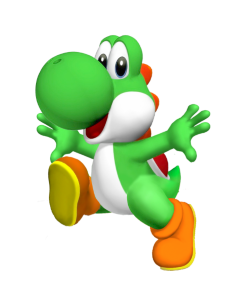


Time to look through everything and wrap it all up! You decide to write out everything to help make your decision: 

### What video game genre is the most popular worldwide?

   Action by far is the most popular genre, in both count of games created and global sales. Following Action is Sports coming in second for both categories. From there, there is a slight divergence in the data. For Sales, the third fourth and fifth places go to Shooter, Role-Playing, and Platform respectively. In terms of count of unique games created, the third category goes to Misc. This could be due to the bias mentioned in the tagging from the original data author. From there, Role-Playing and Shooter come in fourth and fifth. 

### What video game genre is the most popular from region to region

The regional data is interesting. North America leads for sales in every category but one (more on that later). The European sales tend to follow the trend of North America but with smaller sales numbers across the board. The unique callout here is with the Japan data. In Japan, the highest grossing genre of game is Role-Playing, where more Role-Playing games sales happen in Japan than any other region. Japan also has the lowest sales for Shooter and Action games. 

Unfortunately the data for "Other" was not included so it is unclear what countries are included. However, for the most part the Other Sales data follows the trend of North America and Europe from genre to genre. 

* The top genre in **North America** is **Action** with 863.17 millions in sales
* The top genre in **Japan** is **Role-Playing** with 353.44 millions in sales
* The top genre in **Europe** is **Action** with 510.99 millions in sales
* The top genre in the **rest of the world** is **Action** with 182.22 millions in sales

### What does video game genre popularity look like over time?

Most video games genres saw a steady increase from the 1980's to the 1990's, which makes sense from historical market growth in the video game arena. However, it was fascinating to see the significant spike that occured from the 1990's to 2000's, with some genre's increasing 4x from the decade prior. 

There is also a downward trend it seems from 2000's to 2010's era, with video games decreasing in number of games created for each genre. This could be an indicator of decreased interest, but could also be attributed towards more complex and online games being created leading to fewer games total. 

### What publisher has the most global sales?

The publisher with the most global sales is Nintendo!

### What publishers are the most popular region to region?

Nintendo wins for most regions, only coming in second in the Other category to Electronic Arts. Overall, the top 5 publishers remains the same in North America and Europe with Nintendo, Electronic Arts, Activision, Sony, and Ubisoft. Japan is again the outlier here, only sharing 2 of the top 5 with North America and Europe. In Japan, the other publishers to keep an eye on are Namco, Konami Digital, and Capcom. 



---

You've decided, Nintendo it is! You head over the [job website](https://careers.nintendo.com/job-openings/) and apply to everything you see, looks like your career is safe for now! 

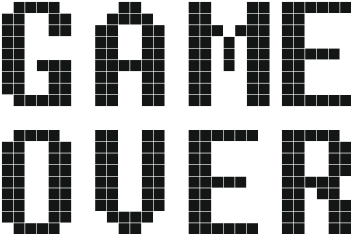